In [1]:
%pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# In case if you are working in a notebook
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


In [2]:
np.random.seed(42)

val = np.arange(10)
np.random.shuffle(val)
print(val)

date_range = pd.date_range(start='2007-04-01', end='2012-03-01', freq='M')
dummy = pd.DataFrame(np.random.randint(10, 1000, size=len(date_range)), index = date_range, columns=['Value'])
print(dummy)

[8 1 5 0 7 2 9 4 3 6]
            Value
2007-04-30    476
2007-05-31    224
2007-06-30    340
2007-07-31    468
2007-08-31     97
2007-09-30    382
2007-10-31    109
2007-11-30    881
2007-12-31    673
2008-01-31    140
2008-02-29    671
2008-03-31    318
2008-04-30    779
2008-05-31    353
2008-06-30    501
2008-07-31    423
2008-08-31    815
2008-09-30    395
2008-10-31    201
2008-11-30    965
2008-12-31    286
2009-01-31    170
2009-02-28    469
2009-03-31    323
2009-04-30     31
2009-05-31    262
2009-06-30    757
2009-07-31    866
2009-08-31    570
2009-09-30    484
2009-10-31     68
2009-11-30    520
2009-12-31    691
2010-01-31    485
2010-02-28    709
2010-03-31    985
2010-04-30    792
2010-05-31    199
2010-06-30    967
2010-07-31    696
2010-08-31    967
2010-09-30    572
2010-10-31    885
2010-11-30    576
2010-12-31    253
2011-01-31    841
2011-02-28    514
2011-03-31    140
2011-04-30    494
2011-05-31    828
2011-06-30    656
2011-07-31     30
2011-08-31    850
2011-0

             Passengers
Travel date            
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
...                 ...
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432

[144 rows x 1 columns]


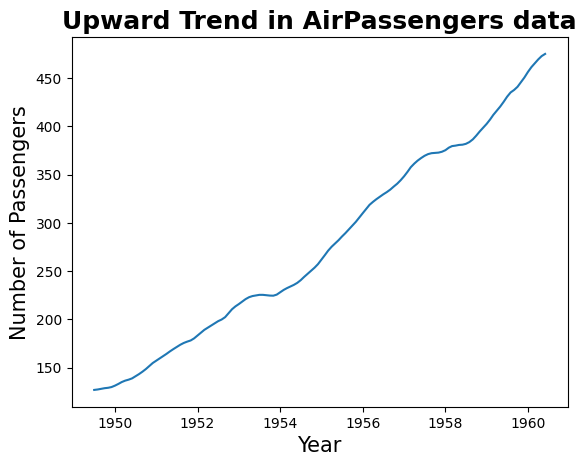

In [3]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
# Loading statsmodel method to perform decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
# Another way to load a time series data by defining a date format
dateparse = lambda dates: pd.datetime.strptime(dates, "%m/%d/%Y")
AirPassengers = pd.read_csv('AirPassengers.csv', index_col='Travel date', date_parser=dateparse)
print(AirPassengers)
# Visualizing trend of Airpassengers data
plt.plot(seasonal_decompose(AirPassengers).trend)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Passengers', fontsize=15)
plt.title('Upward Trend in AirPassengers data', weight='bold', fontsize=18)
plt.show()

### Trends
A long term increase or decrease found in data is known as a trend. A trend may change its direction from upward to downward and vice versa. The direction of the trend can help us draw conclusions from the data.
In the AirPassengers dataset, the graph shows that between 1949 and 1960 the number of passengers was increasing. This is an upward trend. 

Thus, we can establish that the customer base for Cyrus Aviation was steadily increasing.

Let's use a small sample of Google stock dataset to visualize a mixed trend i.e. a data having both upward as well as downward trends. 

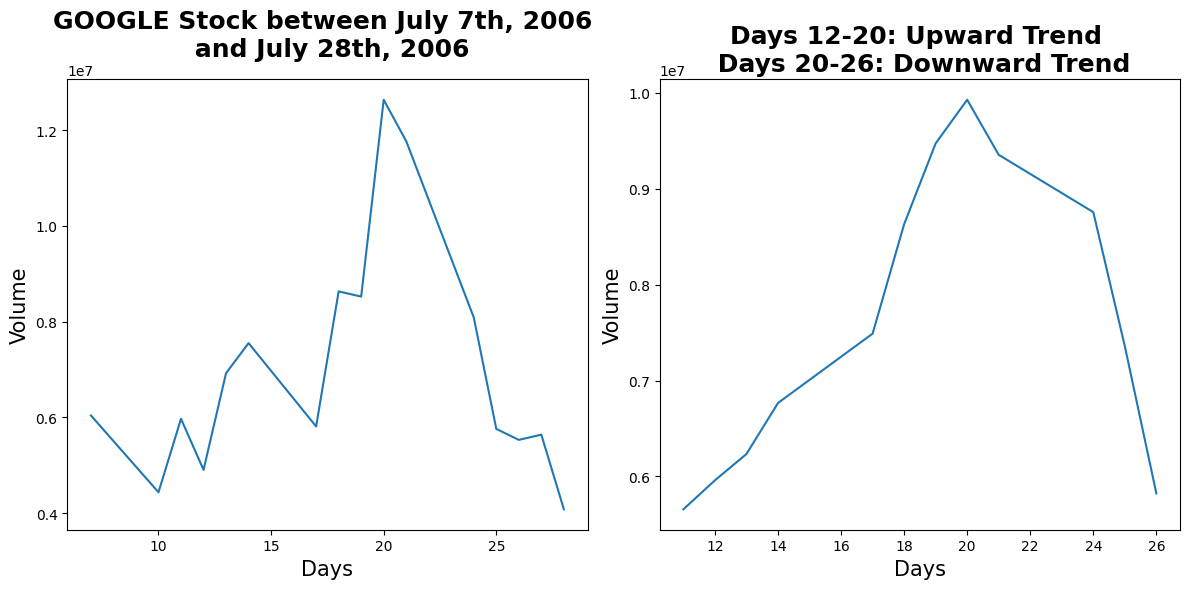

In [4]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
# Reading file
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')
GOOG_stock = pd.read_csv('Google_stock.csv', index_col='Date', date_parser=dateparse)
# Visualizing upward and downward trends
plt.figure(figsize=(12, 6))
ax1 = plt.subplot2grid((1, 2), (0,0))
ax1.plot(GOOG_stock.index.day, # Labeling only days
        GOOG_stock.Volume)
ax1.set_xlabel('Days', fontsize=15)
ax1.set_ylabel('Volume', fontsize=15)
ax1.set_title('GOOGLE Stock between July 7th, 2006 \n and July 28th, 2006', weight='bold', fontsize=18)
ax2 = plt.subplot2grid((1, 2), (0,1))
ax2.plot(GOOG_stock.index.day, seasonal_decompose(GOOG_stock.Volume).trend)
ax2.set_xlabel('Days', fontsize=15)
ax2.set_ylabel('Volume', fontsize=15)
ax2.set_title('Days 12-20: Upward Trend \n Days 20-26: Downward Trend', weight='bold', fontsize=18)
plt.tight_layout()

### Season

A season may be identified as a monthly or quarterly period in a year.

The graph shows that the peak period of flight booking is around the months of July and August. Also, it can be observed that these patterns repeat every year.

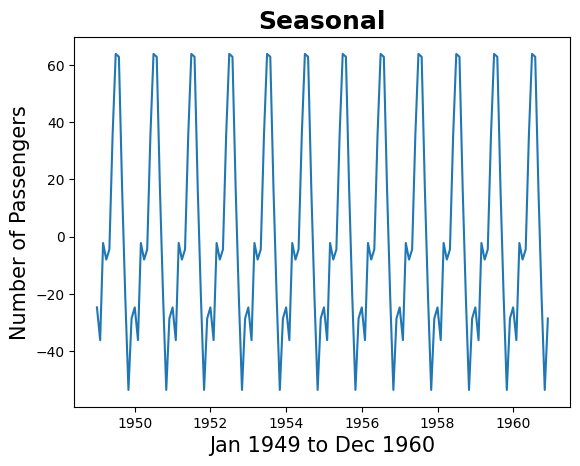

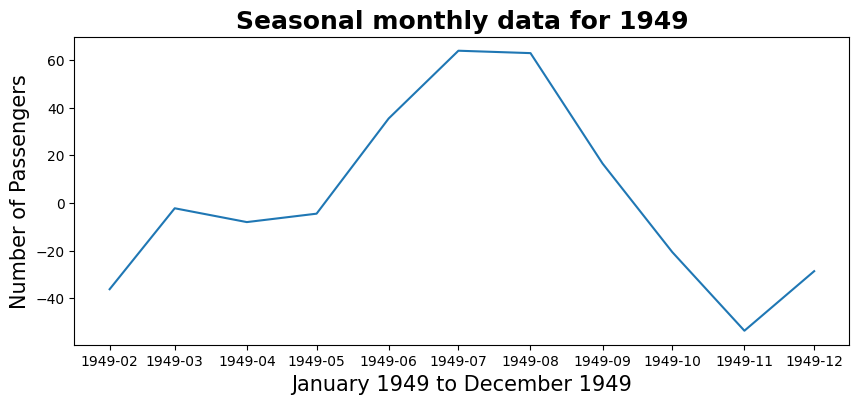

In [5]:
#importing libraries
import matplotlib.pyplot as plt
# Visualizing seasonality of Airpassengers data
plt.plot(seasonal_decompose(AirPassengers).seasonal)
plt.xlabel('Jan 1949 to Dec 1960', fontsize=15)
plt.ylabel('Number of Passengers', fontsize=15)
plt.title('Seasonal', weight='bold', fontsize=18)
plt.show()
# Visualizing seasonality of Airpassengers data for year 1949
plt.figure(figsize=(10, 4))
plt.plot(seasonal_decompose(AirPassengers).seasonal.iloc[1:12])
plt.xlabel('January 1949 to December 1949', fontsize=15)
plt.ylabel('Number of Passengers', fontsize=15)
plt.title('Seasonal monthly data for 1949', weight='bold', fontsize=18)
plt.show()


### Cyclic

Cyclic variations can be identified over a large period of time. Unlike seasonal variations which occur within a year, a cycle may be spread across any period of time. Also, the end of an ongoing cycle is uncertain.

Example: As AirPassengers does not exhibit cyclic variations, let's analyze the hsales dataset.

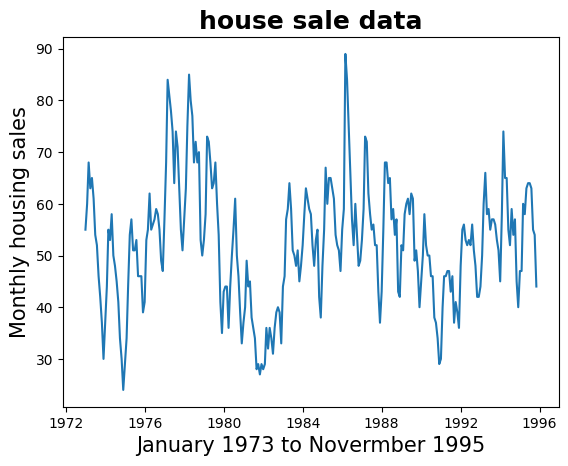

In [6]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
# Reading data
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')
hsales = pd.read_csv('hsales.csv', index_col='date', date_parser=dateparse)
# Visualizing house sales data
plt.plot(hsales)
plt.xlabel('January 1973 to Novermber 1995', fontsize=15)
plt.ylabel('Monthly housing sales', fontsize=15)
plt.title('house sale data', weight='bold', fontsize=18)
plt.show()


Capturing cyclic variations is a challenging process, as it occurs over a vast period of time. For example in this graph, we are not sure when in the future the trend will change its direction from downward to upward or vice-versa.

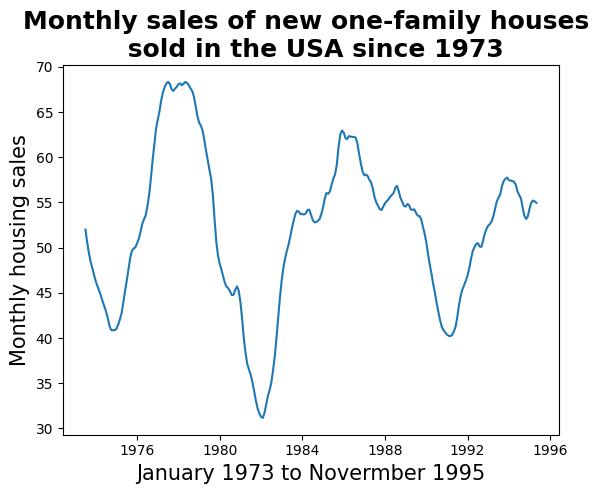

In [7]:
# Importing libraries
import matplotlib.pyplot as plt
# Visualizing monthly sales of new one-family houses
plt.plot(seasonal_decompose(hsales).trend)
plt.xlabel('January 1973 to Novermber 1995', fontsize=15)
plt.ylabel('Monthly housing sales', fontsize=15)
plt.title('Monthly sales of new one-family houses \n sold in the USA since 1973', weight='bold', fontsize=18)
plt.show()

### Random 

When irregular fluctuations occur in the time series data, they can be categorized under Random factors.

For example, let's consider the hsales dataset

If the three components of a time series graph are missing i.e. trends, seasonality, or cyclic then the time series data is termed as random. Time series data does not need to have all the components.

When the other components are removed from the hsales data, we can observe that the remainder appears to be random. Therefore, we can conclude that the hsales data does not have any definite trend, but it has a seasonality component along with a random component.

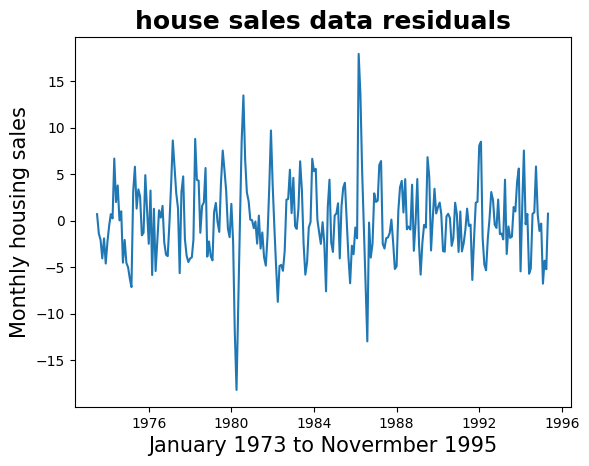

In [8]:
# Importing libraries
import matplotlib.pyplot as plt
# Visualizing residuals of house sales data
plt.plot(seasonal_decompose(hsales).resid)
plt.xlabel('January 1973 to Novermber 1995', fontsize=15)
plt.ylabel('Monthly housing sales', fontsize=15)
plt.title('house sales data residuals', weight='bold', fontsize=18)
plt.show()

## Conclusion

Trend, seasonal, cyclic, and random components help us understand the behavior of time series data. These components help us build a forecasting model. You will learn these forecasting models in the later part of this course.